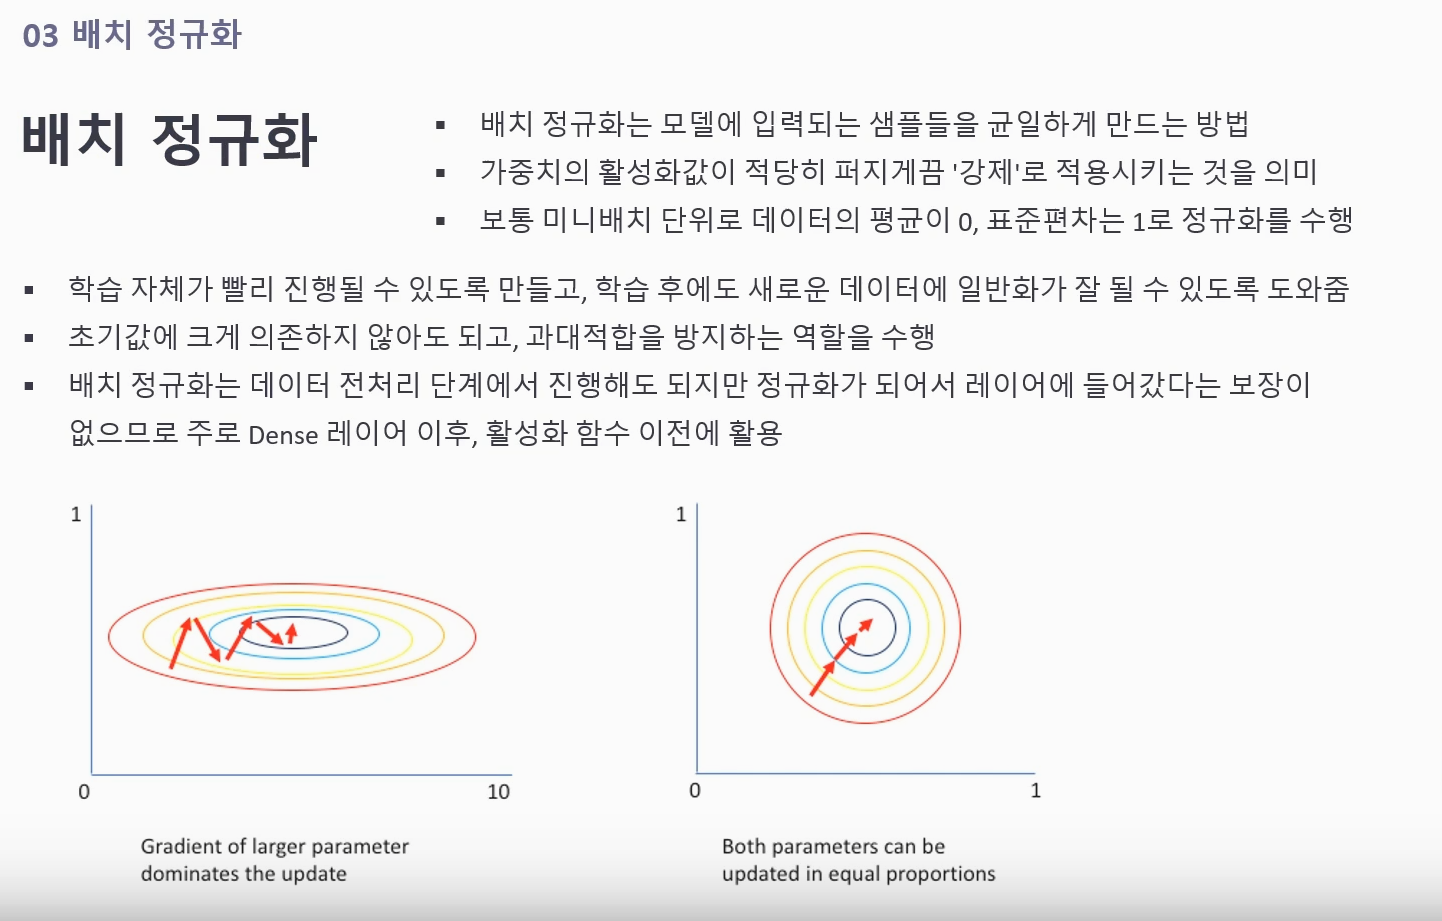

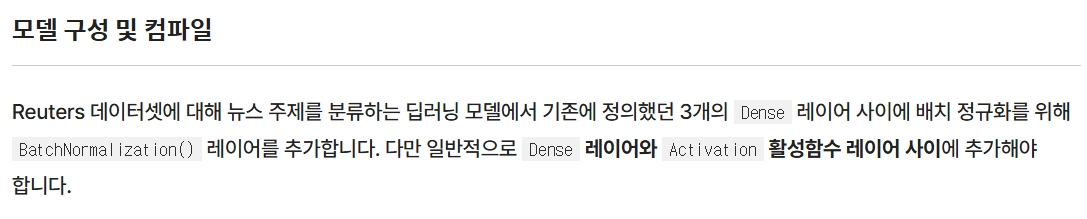

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)                5

In [5]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

8982
2246
46
Epoch 1/40
18/18 [==============================] - 3s 45ms/step - loss: 1.7189 - accuracy: 0.6580 - val_loss: 3.3427 - val_accuracy: 0.7360
Epoch 2/40
18/18 [==============================] - 0s 16ms/step - loss: 0.6276 - accuracy: 0.8798 - val_loss: 3.0967 - val_accuracy: 0.7391
Epoch 3/40
18/18 [==============================] - 0s 16ms/step - loss: 0.3405 - accuracy: 0.9355 - val_loss: 2.7512 - val_accuracy: 0.6901
Epoch 4/40
18/18 [==============================] - 0s 16ms/step - loss: 0.2238 - accuracy: 0.9460 - val_loss: 2.3775 - val_accuracy: 0.6607
Epoch 5/40
18/18 [==============================] - 0s 17ms/step - loss: 0.1740 - accuracy: 0.9502 - val_loss: 2.0355 - val_accuracy: 0.6603
Epoch 6/40
18/18 [==============================] - 0s 17ms/step - loss: 0.1493 - accuracy: 0.9520 - val_loss: 1.7365 - val_accuracy: 0.6941
Epoch 7/40
18/18 [==============================] - 0s 17ms/step - loss: 0.1371 - accuracy: 0.9517 - val_loss: 1.5006 - val_accuracy: 0.6977


In [9]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 35ms/step - loss: 0.0680 - accuracy: 0.9558 - val_loss: 1.4640 - val_accuracy: 0.7881
Epoch 2/40
18/18 [==============================] - 0s 16ms/step - loss: 0.0651 - accuracy: 0.9574 - val_loss: 1.5145 - val_accuracy: 0.7863
Epoch 3/40
18/18 [==============================] - 0s 16ms/step - loss: 0.0666 - accuracy: 0.9556 - val_loss: 1.4432 - val_accuracy: 0.7903
Epoch 4/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0658 - accuracy: 0.9579 - val_loss: 1.5056 - val_accuracy: 0.7872
Epoch 5/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0657 - accuracy: 0.9560 - val_loss: 1.4624 - val_accuracy: 0.7912
Epoch 6/40
18/18 [==============================] - 0s 16ms/step - loss: 0.0647 - accuracy: 0.9569 - val_loss: 1.5108 - val_accuracy: 0.7890
Epoch 7/40
18/18 [==============================] - 0s 16ms/step - loss: 0.0653 - accuracy: 0.9550 - val_loss: 1.4672 - val_accuracy: 0.7867
Epoch 8/40
18

In [12]:
import matplotlib.pyplot as plt


def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

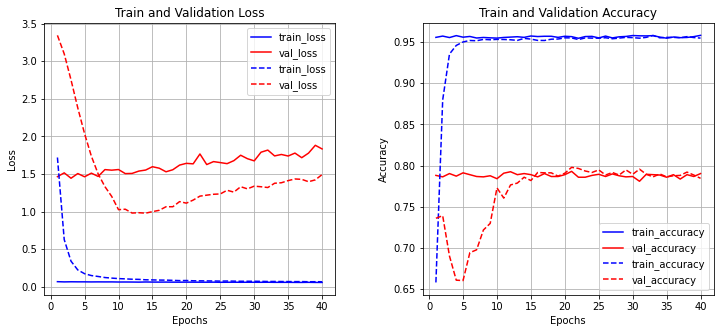

In [13]:
diff_history(history, batch_norm_history)